In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Data Cleaning Techniques
Check basic info and missing values

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Handle Missing Values

In [8]:
titanic['age'].fillna(titanic['age'].median(), inplace=True)

C:\Users\Anik\AppData\Local\Temp\ipykernel_9608\3290119062.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


In [9]:
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

In [10]:
titanic.drop(columns=['deck'], inplace=True)

Handle Duplicates

In [11]:
titanic.duplicated().sum()

np.int64(116)

In [12]:
titanic.drop_duplicates(inplace=True)

Handle Outliers

In [13]:
# Using IQR method
Q1 = titanic['fare'].quantile(0.25)
Q3 = titanic['fare'].quantile(0.75)
IQR = Q3 - Q1

# Define limits
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Cap the outliers
titanic['fare'] = np.where(titanic['fare'] > upper, upper, titanic['fare'])


 Data Transformation
 Convert categorical to numeric

In [14]:
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})

In [15]:
titanic = pd.get_dummies(titanic, columns=['embarked', 'class'], drop_first=True)

Feature engineering (Create new features)

In [16]:
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

In [17]:
titanic['is_alone'] = np.where(titanic['family_size'] == 1, 1, 0)

Normalize numeric features

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [20]:
titanic[['age', 'fare']] = scaler.fit_transform(titanic[['age', 'fare']])

Visualization with Matplotlib & Seaborn
Univariate Analysis

In [21]:
import matplotlib.pyplot as plt

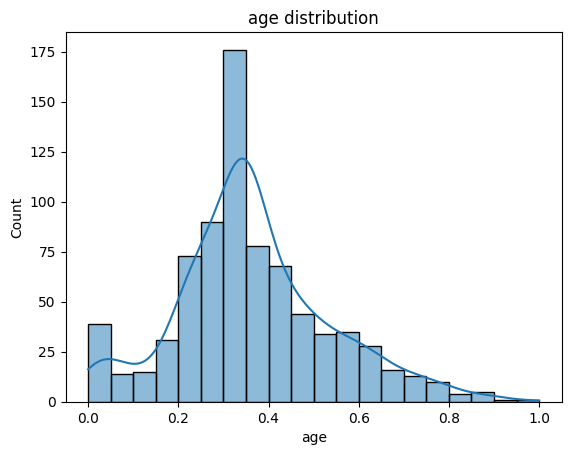

In [22]:
sns.histplot(titanic['age'], kde=True, bins=20)
plt.title('age distribution')
plt.show()

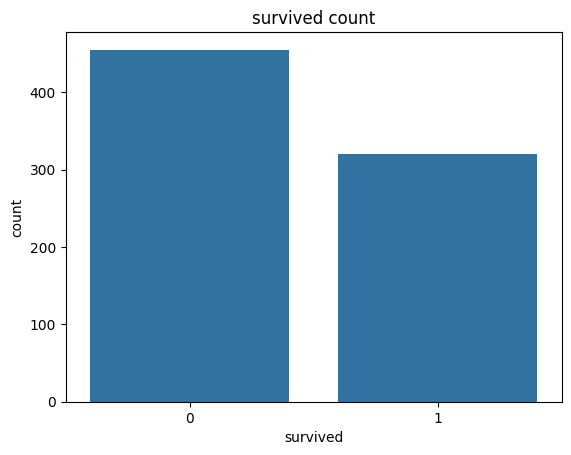

In [24]:
sns.countplot(x='survived', data=titanic)
plt.title('survived count')
plt.show()

Bivariate Analysis

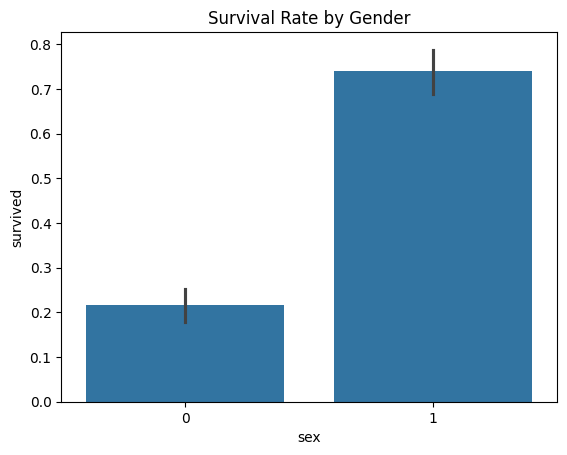

In [25]:
sns.barplot(x='sex', y='survived', data=titanic)
plt.title('Survival Rate by Gender')
plt.show()

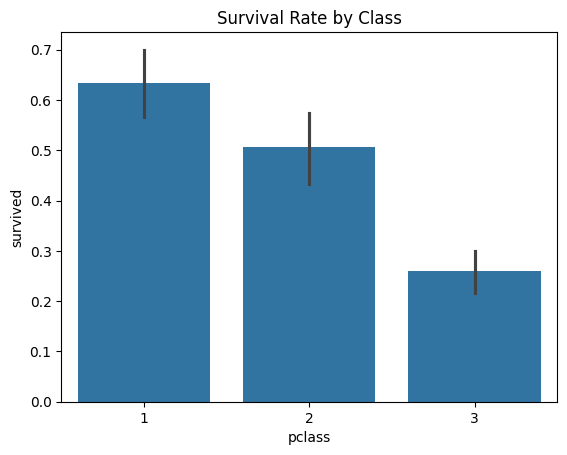

In [26]:
sns.barplot(x='pclass', y='survived', data=titanic)
plt.title('Survival Rate by Class')
plt.show()

Correlation Heatmap

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(titanic.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Interactive Visualization with Plotly

In [33]:
import plotly.express as px


In [34]:
fig = px.scatter(titanic, x='age', y='fare', color='survived',
                 title='Age vs Fare (colored by Survival)',
                 hover_data=['sex', 'pclass'])
fig.show()

In [35]:
fig = px.bar(titanic, x='pclass', color='sex', 
             barmode='group', title='Survival Count by Class and Gender',
             facet_col='survived')
fig.show()

In [36]:
fig = px.histogram(titanic, x='age', color='survived',
                   nbins=20, title='Interactive Age Distribution by Survival')
fig.show()

In [37]:
fig = px.pie(titanic, names='sex', title='Gender Distribution')
fig.show()

Final Cleaned Dataset Overview

In [39]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alive,alone,embarked_Q,embarked_S,class_Second,class_Third,family_size,is_alone
0,0,3,0,0.271174,1,0,0.098747,man,True,Southampton,no,False,False,True,False,True,2,0
1,1,1,1,0.472229,1,0,0.970901,woman,False,Cherbourg,yes,False,False,False,False,False,2,0
2,1,3,1,0.321438,0,0,0.107941,woman,False,Southampton,yes,True,False,True,False,True,1,1
3,1,1,1,0.434531,1,0,0.723239,woman,False,Southampton,yes,False,False,True,False,False,2,0
4,0,3,0,0.434531,0,0,0.109644,man,True,Southampton,no,True,False,True,False,True,1,1


In [40]:
titanic.describe()

,survived,pclass,sex,age,sibsp,parch,fare,family_size,is_alone
count,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000
mean,0.412903,2.246452,0.376774,0.366439,0.529032,0.420645,0.362207,1.949677,0.563871
std,0.492674,0.853574,0.484890,0.172988,0.990326,0.840565,0.311539,1.522882,0.496224
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,1.000000,0.000000,0.258608,0.000000,0.000000,0.109644,1.000000,0.000000
50%,0.000000,3.000000,0.000000,0.346569,0.000000,0.000000,0.216563,1.000000,1.000000
75%,1.000000,3.000000,1.000000,0.447097,1.000000,1.000000,0.465786,2.000000,1.000000
max,1.000000,3.000000,1.000000,1.000000,8.000000,6.000000,1.000000,11.000000,1.000000
